# Débug

In [1]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.1

# Prétraitement

## Redimension

In [2]:
import os
from PIL import Image

# Dossiers de base
base_folders = {
    "left": "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train",
    "gt": "/Users/kevinroualec/Desktop/imgp8/gtFine/train"
}

# Création des dossiers de sortie "resized" pour chaque dossier train
output_folders = {key: os.path.join(folder, "resized") for key, folder in base_folders.items()}
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Vérification si c'est une image gtFine
def is_gtfine_image(filename):
    return filename.lower().endswith('gtfine_instanceids.png')

# Stocker les images groupées par leur préfixe
grouped_images = {}

# Exploration des dossiers
for key, folder in base_folders.items():
    for city in os.listdir(folder):
        city_path = os.path.join(folder, city)
        if not os.path.isdir(city_path):
            continue

        for image_file in os.listdir(city_path):
            if key == "gt" and not is_gtfine_image(image_file):
                continue
            if key == "left" and not image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            prefix = "_".join(image_file.split('_')[:3])
            grouped_images.setdefault(prefix, {"left": None, "gt": None})
            image_path = os.path.join(city_path, image_file)

            if key == "left":
                grouped_images[prefix]["left"] = image_path
            else:
                grouped_images[prefix]["gt"] = image_path

# Traitement et sauvegarde
for prefix, images in grouped_images.items():
    left_path, gt_path = images["left"], images["gt"]

    if left_path:
        try:
            left_image = Image.open(left_path).resize((1024, 512))
            save_path = os.path.join(output_folders["left"], f"{prefix}_leftImg8bit.png")
            left_image.save(save_path)
        except Exception as e:
            print(f"Erreur avec l'image gauche {prefix}: {e}")

    if gt_path:
        try:
            gt_image = Image.open(gt_path).resize((1024, 512))
            save_path = os.path.join(output_folders["gt"], f"{prefix}_gtFine_instanceIds.png")
            gt_image.save(save_path)
        except Exception as e:
            print(f"Erreur avec l'image gtFine {prefix}: {e}")

print("Redimensionnement terminé avec succès.")


Redimensionnement terminé avec succès.


In [ ]:
import os
from PIL import Image

# Dossiers de base
base_folders = {
    "left": "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train",
    "gt": "/Users/kevinroualec/Desktop/imgp8/gtFine/train"
}

# Création des dossiers de sortie "resized" pour chaque dossier train
output_folders = {key: os.path.join(folder, "resized") for key, folder in base_folders.items()}
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Vérification si c'est une image gtFine
def is_gtfine_image(filename):
    return filename.lower().endswith('gtfine_instanceids.png')

# Stocker les images groupées par leur préfixe
grouped_images = {}

# Exploration des dossiers
for key, folder in base_folders.items():
    for city in os.listdir(folder):
        city_path = os.path.join(folder, city)
        if not os.path.isdir(city_path):
            continue

        for image_file in os.listdir(city_path):
            if key == "gt" and not is_gtfine_image(image_file):
                continue
            if key == "left" and not image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            prefix = "_".join(image_file.split('_')[:3])
            grouped_images.setdefault(prefix, {"left": None, "gt": None})
            image_path = os.path.join(city_path, image_file)

            if key == "left":
                grouped_images[prefix]["left"] = image_path
            else:
                grouped_images[prefix]["gt"] = image_path

# Traitement et sauvegarde
for prefix, images in grouped_images.items():
    left_path, gt_path = images["left"], images["gt"]

    if left_path:
        try:
            left_image = Image.open(left_path).resize((512, 256))
            save_path = os.path.join(output_folders["left"], f"{prefix}_leftImg8bit.png")
            left_image.save(save_path)
        except Exception as e:
            print(f"Erreur avec l'image gauche {prefix}: {e}")

    if gt_path:
        try:
            gt_image = Image.open(gt_path).resize((512, 256))
            save_path = os.path.join(output_folders["gt"], f"{prefix}_gtFine_instanceIds.png")
            gt_image.save(save_path)
        except Exception as e:
            print(f"Erreur avec l'image gtFine {prefix}: {e}")

print("Redimensionnement terminé avec succès.")


# Unet

## Sans augmentation

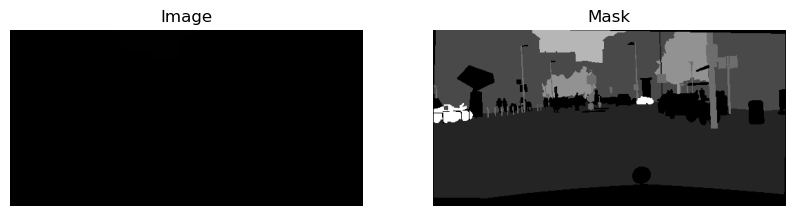

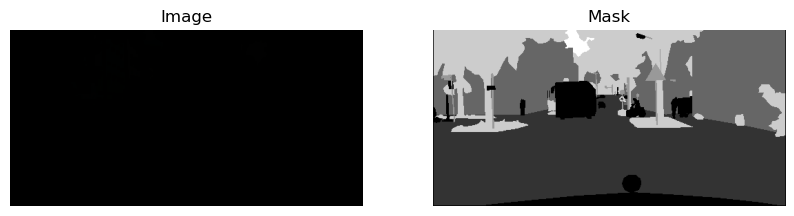

Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3920 - f1-score: 0.2273 - iou_score: 0.1344 - loss: 1.8495

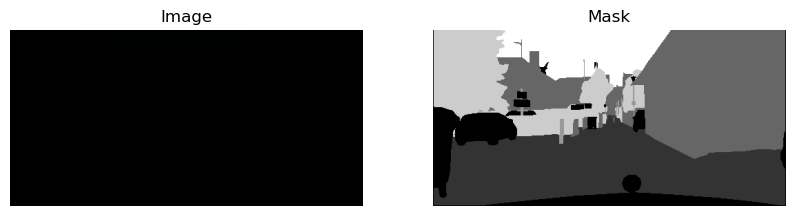

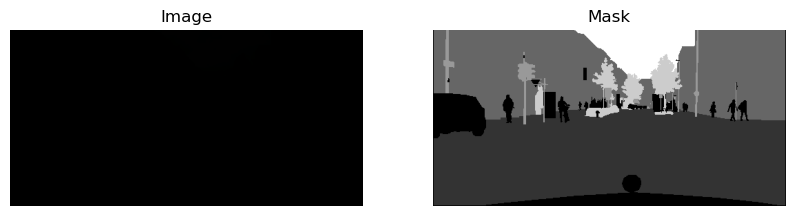


Epoch 1: val_iou_score improved from -inf to 0.13485, saving model to unet_model_best_iou_aug.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.3920 - f1-score: 0.2272 - iou_score: 0.1344 - loss: 1.8483 - val_accuracy: 0.4027 - val_f1-score: 0.2185 - val_iou_score: 0.1348 - val_loss: 1.2528 - learning_rate: 1.0000e-04
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4382 - f1-score: 0.2166 - iou_score: 0.1367 - loss: 1.1838
Epoch 2: val_iou_score improved from 0.13485 to 0.13647, saving model to unet_model_best_iou_aug.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.4384 - f1-score: 0.2166 - iou_score: 0.1367 - loss: 1.1836 - val_accuracy: 0.5531 - val_f1-score: 0.2161 - val_iou_score: 0.1365 - val_loss: 1.1064 - learning_rate: 1.0000e-04
Epoch 3/50
 52/185 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.5620 - f1-score: 0.2161 - iou_score: 0.1368 - loss: 1.0783

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from collections import namedtuple
import segmentation_models as sm
import tensorflow as tf
from tensorflow.keras import layers, models

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', [
    'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'
])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void',
    1: 'flat',
    2: 'construction',
    3: 'object',
    4: 'nature',
    5: 'sky',
    6: 'human',
    7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name,
        id=label.id,
        trainId=label.trainId,
        category=new_category,
        categoryId=label.categoryId,
        hasInstances=label.hasInstances,
        ignoreInEval=label.ignoreInEval,
        color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

# Fonction pour récupérer les chemins d'image dans les sous-dossiers
def get_image_paths(directory):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Fonction pour charger et normaliser les images
def load_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=(256, 512))
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0
        return img
    except Exception as e:
        print(f"Warning: {image_path} is corrupted or cannot be loaded. Skipping this file.")
        return None

# Fonction pour charger les masques
def load_mask(mask_path):
    try:
        img = keras.preprocessing.image.load_img(mask_path, target_size=(256, 512), color_mode="grayscale")
        img = keras.preprocessing.image.img_to_array(img)
        return img
    except Exception as e:
        print(f"Warning: {mask_path} is corrupted or cannot be loaded. Skipping this file. Error: {e}")
        return None

# Fonction pour appliquer le mappage des catégories sur le masque
def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

# Fonction de visualisation pour afficher l'image et son masque côte à côte
def visualize_sample(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

def data_generator(image_paths, mask_paths, batch_size, visualize=True):
    index = 0
    first_batch = True
    shuffle_indices = np.arange(len(image_paths))
    np.random.shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []

        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_filename = os.path.basename(image_path).replace('leftImg8bit', 'gtFine_instanceIds')
            mask_path = next((mp for mp in mask_paths if os.path.basename(mp) == mask_filename), None)

            if not mask_path:
                print(f"Erreur: Aucun masque trouvé pour l'image {image_path}.")
                index += 1
                continue

            img = load_image(image_path)
            mask = load_mask(mask_path)
            if img is not None and mask is not None:
                if img.shape[:2] != mask.shape[:2]:
                    print(f"Erreur: L'image {image_path} et son masque {mask_path} ont des tailles différentes.")
                    continue

                mask = apply_category_mapping(mask)
                mask = mask.astype('float32')

                if img.shape[:2] != (256, 512) or mask.shape[:2] != (256, 512):
                    print(f"Erreur: L'image ou le masque n'ont pas la taille attendue après transformation.")
                    continue

                batch_images.append(img)
                batch_masks.append(mask)

            index += 1

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], batch_masks[i])
            first_batch = False

        yield np.array(batch_images), np.array(batch_masks)

def unet_model():
    inputs = layers.Input((256, 512, 3))

    # Contracting path
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    # Expanding path
    u5 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(8, (1, 1), activation='softmax')(c7)

    model = models.Model(inputs, outputs)
    return model

# Initialisation du modèle
model = unet_model()


# Créer les métriques (IoU, Dice, Accuracy)
iou_metric = sm.metrics.IOUScore()
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Définition d'un optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compilation du modèle
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

# Paramètres d'entraînement
batch_size = 16
epochs = 50

# Récupération des images et masques pour l'entraînement
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine)

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine)

train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('unet_model_best_iou_aug.keras', monitor='val_iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=2, verbose=1),
    EarlyStopping(patience=25, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // batch_size,
    validation_data=val_gen,
    validation_steps=len(val_images_paths) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

def plot_metrics(history):
    plt.figure(figsize=(16, 12))
    metrics = ['loss', 'accuracy', 'f1-score', 'iou_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            plt.title(metric.replace('_', ' ').capitalize())
            plt.legend()
            plt.grid()
    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path, target_size=(256, 512)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def load_and_preprocess_mask(mask_path, target_size=(256, 512)):
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, target_size, method='nearest')
    mask = tf.cast(mask, tf.int32)
    return mask

def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_and_preprocess_image(image_path)
    mask = load_and_preprocess_mask(mask_path)

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask Réel")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_instanceIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model)


## Avec augmentation

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Concatenate, UpSampling2D, Cropping2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import ResNet50
from collections import namedtuple
import albumentations as A
from albumentations import Compose, HorizontalFlip, RandomBrightnessContrast, RandomRotate90, PadIfNeeded, CenterCrop
import segmentation_models as sm
import cv2
from tensorflow.keras import layers, models

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', [
    'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'
])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void',
    1: 'flat',
    2: 'construction',
    3: 'object',
    4: 'nature',
    5: 'sky',
    6: 'human',
    7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name,
        id=label.id,
        trainId=label.trainId,
        category=new_category,
        categoryId=label.categoryId,
        hasInstances=label.hasInstances,
        ignoreInEval=label.ignoreInEval,
        color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

# Fonction pour récupérer les chemins d'image dans les sous-dossiers
def get_image_paths(directory):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Fonction pour charger et normaliser les images
def load_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=(256, 512))
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0
        return img
    except Exception as e:
        print(f"Warning: {image_path} is corrupted or cannot be loaded. Skipping this file.")
        return None

# Fonction pour charger les masques
def load_mask(mask_path):
    try:
        img = keras.preprocessing.image.load_img(mask_path, target_size=(256, 512), color_mode="grayscale")
        img = keras.preprocessing.image.img_to_array(img)
        return img
    except Exception as e:
        print(f"Warning: {mask_path} is corrupted or cannot be loaded. Skipping this file. Error: {e}")
        return None

# Fonction pour appliquer le mappage des catégories sur le masque
def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

# Fonction de visualisation pour afficher l'image et son masque côte à côte
def visualize_sample(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

# Définir les transformations d'augmentation avec une probabilité de 0.5
transform = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    RandomRotate90(p=0.5),
    PadIfNeeded(min_height=256, min_width=512, border_mode=cv2.BORDER_REFLECT_101, p=1.0),
    CenterCrop(height=256, width=512, p=1.0)
], p=0.5)  # Probabilité globale pour appliquer les transformations

def data_generator(image_paths, mask_paths, batch_size, visualize=True):
    index = 0
    first_batch = True
    shuffle_indices = np.arange(len(image_paths))
    np.random.shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []

        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_filename = os.path.basename(image_path).replace('leftImg8bit', 'gtFine_instanceIds')
            mask_path = next((mp for mp in mask_paths if os.path.basename(mp) == mask_filename), None)

            if not mask_path:
                print(f"Erreur: Aucun masque trouvé pour l'image {image_path}.")
                index += 1
                continue

            img = load_image(image_path)
            mask = load_mask(mask_path)
            if img is not None and mask is not None:
                if img.shape[:2] != mask.shape[:2]:
                    print(f"Erreur: L'image {image_path} et son masque {mask_path} ont des tailles différentes.")
                    continue

                img = A.Resize(height=256, width=512)(image=img)['image']
                mask = A.Resize(height=256, width=512)(image=mask)['image']
                mask = apply_category_mapping(mask)
                mask = mask.astype('float32')

                augmented = transform(image=img, mask=mask)
                img = augmented['image']
                mask = augmented['mask']

                if img.shape[:2] != (256, 512) or mask.shape[:2] != (256, 512):
                    print(f"Erreur: L'image ou le masque n'ont pas la taille attendue après transformation.")
                    continue

                batch_images.append(img)
                batch_masks.append(mask)

            index += 1

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], batch_masks[i])
            first_batch = False

        yield np.array(batch_images), np.array(batch_masks)

def unet_model():
    inputs = layers.Input((256, 512, 3))

    # Contracting path
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    # Expanding path
    u5 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(8, (1, 1), activation='softmax')(c7)

    model = models.Model(inputs, outputs)
    return model

# Initialisation du modèle
model = unet_model()

# Créer les métriques (IoU, Dice, Accuracy)
iou_metric = sm.metrics.IOUScore()
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Définition d'un optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compilation du modèle
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

# Paramètres d'entraînement
batch_size = 16
epochs = 50

# Récupération des images et masques pour l'entraînement
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine)

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine)

train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('unet_model_best_iou_aug.keras', monitor='val_iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    EarlyStopping(patience=25, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // batch_size,
    validation_data=val_gen,
    validation_steps=len(val_images_paths) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

def plot_metrics(history):
    plt.figure(figsize=(16, 12))
    metrics = ['loss', 'accuracy', 'f1-score', 'iou_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            plt.title(metric.replace('_', ' ').capitalize())
            plt.legend()
            plt.grid()
    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path, target_size=(256, 512)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def load_and_preprocess_mask(mask_path, target_size=(256, 512)):
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, target_size, method='nearest')
    mask = tf.cast(mask, tf.int32)
    return mask

def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_and_preprocess_image(image_path)
    mask = load_and_preprocess_mask(mask_path)

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask Réel")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_instanceIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model)


# UNET + resnet50

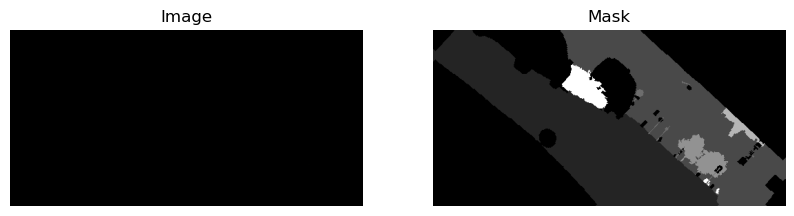

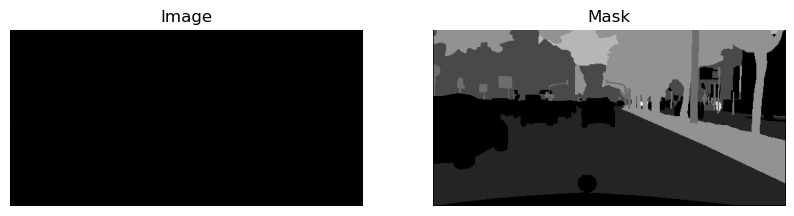

Epoch 1/50
  5/185 ━━━━━━━━━━━━━━━━━━━━ 29:21 10s/step - accuracy: 0.3709 - f1-score: 0.2294 - iou_score: 0.1327 - loss: 2.0026

KeyboardInterrupt: 

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Concatenate, UpSampling2D, Cropping2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import ResNet50
from collections import namedtuple
import albumentations as A
from albumentations import Compose, HorizontalFlip, RandomBrightnessContrast, Rotate, RandomScale, PadIfNeeded, CenterCrop
import segmentation_models as sm
import cv2

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', [
    'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'
])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void',
    1: 'flat',
    2: 'construction',
    3: 'object',
    4: 'nature',
    5: 'sky',
    6: 'human',
    7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name,
        id=label.id,
        trainId=label.trainId,
        category=new_category,
        categoryId=label.categoryId,
        hasInstances=label.hasInstances,
        ignoreInEval=label.ignoreInEval,
        color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

# Fonction pour récupérer les chemins d'image dans les sous-dossiers
def get_image_paths(directory):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Fonction pour charger et normaliser les images
def load_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=(256, 512))
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0
        return img
    except Exception as e:
        print(f"Warning: {image_path} is corrupted or cannot be loaded. Skipping this file.")
        return None

# Fonction pour charger les masques
def load_mask(mask_path):
    try:
        img = keras.preprocessing.image.load_img(mask_path, target_size=(256, 512), color_mode="grayscale")
        img = keras.preprocessing.image.img_to_array(img)
        return img
    except Exception as e:
        print(f"Warning: {mask_path} is corrupted or cannot be loaded. Skipping this file. Error: {e}")
        return None

# Fonction pour appliquer le mappage des catégories sur le masque
def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

# Fonction de visualisation pour afficher l'image et son masque côte à côte
def visualize_sample(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

# Définir les transformations d'augmentation avec une probabilité de 0.5
transform = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    Rotate(limit=45, p=0.5),
    RandomScale(scale_limit=0.2, p=0.5),
    PadIfNeeded(min_height=256, min_width=512, border_mode=cv2.BORDER_REFLECT_101, p=1.0),
    CenterCrop(height=256, width=512, p=1.0)
], p=0.5)  # Probabilité globale pour appliquer les transformations

def data_generator(image_paths, mask_paths, batch_size, visualize=True):
    index = 0
    first_batch = True
    shuffle_indices = np.arange(len(image_paths))
    np.random.shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []

        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_filename = os.path.basename(image_path).replace('leftImg8bit', 'gtFine_instanceIds')
            mask_path = next((mp for mp in mask_paths if os.path.basename(mp) == mask_filename), None)

            if not mask_path:
                print(f"Erreur: Aucun masque trouvé pour l'image {image_path}.")
                index += 1
                continue

            img = load_image(image_path)
            mask = load_mask(mask_path)
            if img is not None and mask is not None:
                if img.shape[:2] != mask.shape[:2]:
                    print(f"Erreur: L'image {image_path} et son masque {mask_path} ont des tailles différentes.")
                    continue

                img = A.Resize(height=256, width=512)(image=img)['image']
                mask = A.Resize(height=256, width=512)(image=mask)['image']
                mask = apply_category_mapping(mask)
                mask = mask.astype('float32')

                augmented = transform(image=img, mask=mask)
                img = augmented['image']
                mask = augmented['mask']

                if img.shape[:2] != (256, 512) or mask.shape[:2] != (256, 512):
                    print(f"Erreur: L'image ou le masque n'ont pas la taille attendue après transformation.")
                    continue

                batch_images.append(img)
                batch_masks.append(mask)

            index += 1

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], batch_masks[i])
            first_batch = False

        yield np.array(batch_images), np.array(batch_masks)

def build_unet(input_shape):
    inputs = Input(input_shape)

    resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)
    for layer in resnet.layers[-24:]:
        layer.trainable = True

    skip1 = resnet.get_layer('conv2_block3_out').output
    skip2 = resnet.get_layer('conv3_block4_out').output
    skip3 = resnet.get_layer('conv4_block6_out').output
    skip4 = resnet.get_layer('conv5_block3_out').output
    bridge = resnet.get_layer('conv5_block3_out').output

    skip4_adj = Conv2D(1024, (1, 1), padding='same')(skip4)
    skip3_adj = Conv2D(512, (1, 1), padding='same')(skip3)
    skip2_adj = Conv2D(256, (1, 1), padding='same')(skip2)
    skip1_adj = Conv2D(128, (1, 1), padding='same')(skip1)

    d1 = Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(bridge)
    skip4_adj = UpSampling2D(size=(2, 2), interpolation='bilinear')(skip4_adj)

    d1 = Concatenate()([d1, skip4_adj])
    d1 = Conv2D(1024, (3, 3), activation='relu', padding='same')(d1)
    d1 = BatchNormalization()(d1)
    d1 = Dropout(0.5)(d1)
    d1 = Conv2D(1024, (3, 3), activation='relu', padding='same')(d1)
    d1 = BatchNormalization()(d1)
    d1 = Dropout(0.5)(d1)

    d2 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(d1)
    skip3_adj = UpSampling2D(size=(2, 2), interpolation='bilinear')(skip3_adj)

    d2 = Concatenate()([d2, skip3_adj])
    d2 = Conv2D(512, (3, 3), activation='relu', padding='same')(d2)
    d2 = BatchNormalization()(d2)
    d2 = Dropout(0.5)(d2)
    d2 = Conv2D(512, (3, 3), activation='relu', padding='same')(d2)
    d2 = BatchNormalization()(d2)
    d2 = Dropout(0.5)(d2)

    d3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(d2)
    skip2_adj = UpSampling2D(size=(2, 2), interpolation='bilinear')(skip2_adj)

    d3 = Concatenate()([d3, skip2_adj])
    d3 = Conv2D(256, (3, 3), activation='relu', padding='same')(d3)
    d3 = BatchNormalization()(d3)
    d3 = Dropout(0.5)(d3)
    d3 = Conv2D(256, (3, 3), activation='relu', padding='same')(d3)
    d3 = BatchNormalization()(d3)
    d3 = Dropout(0.5)(d3)

    d4 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(d3)
    skip1_adj = UpSampling2D(size=(2, 2), interpolation='bilinear')(skip1_adj)

    d4 = Concatenate()([d4, skip1_adj])
    d4 = Conv2D(128, (3, 3), activation='relu', padding='same')(d4)
    d4 = BatchNormalization()(d4)
    d4 = Dropout(0.5)(d4)
    d4 = Conv2D(128, (3, 3), activation='relu', padding='same')(d4)
    d4 = BatchNormalization()(d4)
    d4 = Dropout(0.5)(d4)

    d4 = UpSampling2D(size=(2, 2), interpolation='bilinear')(d4)

    outputs = Conv2D(8, (1, 1), activation='softmax', padding='same')(d4)

    model = Model(inputs, outputs)
    return model

# Initialisation du modèle
model = build_unet((256, 512, 3))


# Créer les métriques (IoU, Dice, Accuracy)
iou_metric = sm.metrics.IOUScore()
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Définition d'un optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compilation du modèle
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

# Paramètres d'entraînement
batch_size = 16
epochs = 50

# Récupération des images et masques pour l'entraînement
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine)

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine)

train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('unet_model_best_iou_res_aug.keras', monitor='val_iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
    EarlyStopping(patience=25, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // batch_size,
    validation_data=val_gen,
    validation_steps=len(val_images_paths) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

def plot_metrics(history):
    plt.figure(figsize=(16, 12))
    metrics = ['loss', 'accuracy', 'f1-score', 'iou_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            plt.title(metric.replace('_', ' ').capitalize())
            plt.legend()
            plt.grid()
    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path, target_size=(256, 512)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def load_and_preprocess_mask(mask_path, target_size=(256, 512)):
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, target_size, method='nearest')
    mask = tf.cast(mask, tf.int32)
    return mask

def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_and_preprocess_image(image_path)
    mask = load_and_preprocess_mask(mask_path)

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask Réel")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_instanceIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model)


# EfficientNet + FPN

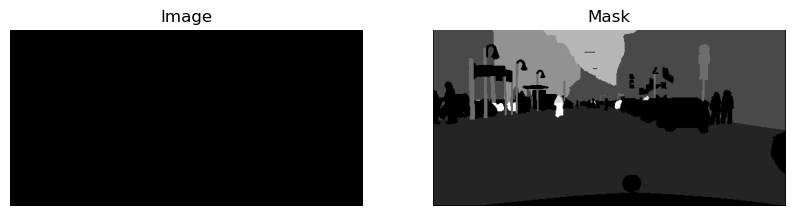

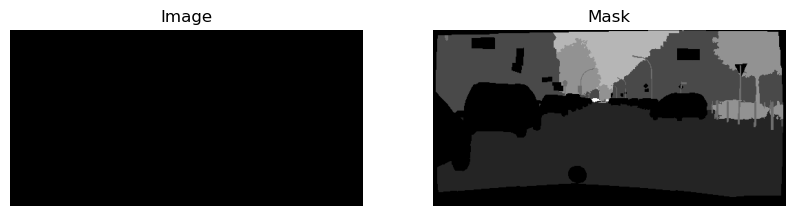

Epoch 1/50
  7/371 ━━━━━━━━━━━━━━━━━━━━ 2:35:33 26s/step - accuracy: 0.2592 - f1-score: 0.2041 - iou_score: 0.1572 - loss: 2.7692

KeyboardInterrupt: 

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, UpSampling2D, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import EfficientNetB3
from collections import namedtuple
import albumentations as A
from albumentations import (
    Compose, HorizontalFlip, RandomBrightnessContrast, RandomRotate90, PadIfNeeded, RandomCrop,
    RandomScale, ShiftScaleRotate, GridDistortion, ElasticTransform, OpticalDistortion,
    HueSaturationValue, GaussNoise, MotionBlur, MedianBlur, Blur
)
import segmentation_models as sm
import cv2

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', [
    'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'
])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void',
    1: 'flat',
    2: 'construction',
    3: 'object',
    4: 'nature',
    5: 'sky',
    6: 'human',
    7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name,
        id=label.id,
        trainId=label.trainId,
        category=new_category,
        categoryId=label.categoryId,
        hasInstances=label.hasInstances,
        ignoreInEval=label.ignoreInEval,
        color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

# Fonction pour récupérer les chemins d'image dans les sous-dossiers
def get_image_paths(directory):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Fonction pour charger et normaliser les images
def load_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=(256, 512))
        img = keras.preprocessing.image.img_to_array(img) / 255.0
        return img
    except Exception as e:
        print(f"Warning: {image_path} is corrupted or cannot be loaded. Skipping this file.")
        return None

# Fonction pour charger les masques
def load_mask(mask_path):
    try:
        img = keras.preprocessing.image.load_img(mask_path, target_size=(256, 512), color_mode="grayscale")
        return keras.preprocessing.image.img_to_array(img).astype('float32')
    except Exception as e:
        print(f"Warning: {mask_path} is corrupted or cannot be loaded. Skipping this file. Error: {e}")
        return None

# Fonction pour appliquer le mappage des catégories sur le masque
def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

# Fonction de visualisation pour afficher l'image et son masque côte à côte
def visualize_sample(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

# Définir les transformations d'augmentation avec une probabilité de 0.5
transform = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    RandomRotate90(p=0.5),
    PadIfNeeded(min_height=256, min_width=512, border_mode=cv2.BORDER_REFLECT_101, p=1.0),
    RandomCrop(height=256, width=512, p=1.0),
    RandomScale(scale_limit=0.2, p=0.5),
    ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=45, p=0.5),
    GridDistortion(p=0.5),
    ElasticTransform(p=0.5),
    OpticalDistortion(p=0.5),
    HueSaturationValue(p=0.5),
    GaussNoise(p=0.5),
    MotionBlur(p=0.5),
    MedianBlur(blur_limit=3, p=0.5),
    Blur(blur_limit=3, p=0.5)
], p=0.5)  # Probabilité globale pour appliquer les transformations

def data_generator(image_paths, mask_paths, batch_size, visualize=True):
    index = 0
    first_batch = True
    shuffle_indices = np.arange(len(image_paths))
    np.random.shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []

        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_filename = os.path.basename(image_path).replace('leftImg8bit', 'gtFine_instanceIds')
            mask_path = next((mp for mp in mask_paths if os.path.basename(mp) == mask_filename), None)

            if not mask_path:
                print(f"Erreur: Aucun masque trouvé pour l'image {image_path}.")
                index += 1
                continue

            img = load_image(image_path)
            mask = load_mask(mask_path)
            if img is not None and mask is not None:
                if img.shape[:2] != mask.shape[:2]:
                    #print(f"Erreur: L'image {image_path} et son masque {mask_path} ont des tailles différentes.")
                    continue

                img = A.Resize(height=256, width=512)(image=img)['image']
                mask = A.Resize(height=256, width=512)(image=mask)['image']
                mask = apply_category_mapping(mask)
                mask = mask.astype('float32')

                augmented = transform(image=img, mask=mask)
                img = augmented['image']
                mask = augmented['mask']

                if img.shape[:2] != (256, 512) or mask.shape[:2] != (256, 512):
                    #print(f"Erreur: L'image ou le masque n'ont pas la taille attendue après transformation.")
                    continue

                batch_images.append(img)
                batch_masks.append(mask)

            index += 1

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], batch_masks[i])
            first_batch = False

        yield np.array(batch_images), np.array(batch_masks)

# Fonction de perte combinée : Dice + Cross Entropy
def combined_loss(y_true, y_pred):
    dice_loss = sm.losses.DiceLoss(class_weights=np.ones(8))(y_true, y_pred)
    ce_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_true, y_pred)
    return dice_loss + ce_loss

def build_efficientnet_fpn(input_shape):
    inputs = Input(input_shape)
    backbone = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=inputs)

    skip_layers = ['block2b_add', 'block3b_add', 'block4c_add', 'block6e_add']
    skips = [backbone.get_layer(name).output for name in skip_layers]
    bridge = backbone.get_layer('top_conv').output

    fpn_layers = [Conv2D(256, (1, 1), activation='relu', padding='same')(skip) for skip in skips]
    fpn_layers = [UpSampling2D(size=(2**i, 2**i), interpolation='bilinear')(layer) for i, layer in enumerate(fpn_layers)]

    target_size = (256, 512)
    fpn_layers = [Lambda(lambda x: tf.image.resize(x, target_size))(layer) for layer in fpn_layers]

    fpn_combined = Concatenate()(fpn_layers)
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(fpn_combined)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    outputs = Conv2D(8, (1, 1), activation='softmax', padding='same')(x)
    outputs = Lambda(lambda x: tf.image.resize(x, target_size))(outputs)

    model = Model(inputs, outputs)
    return model

# Initialisation du modèle
model = build_efficientnet_fpn((256, 512, 3))

# Créer les métriques (IoU, Dice, Accuracy)
iou_metric = sm.metrics.IOUScore()
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Définition d'un optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compilation du modèle
model.compile(
    optimizer=optimizer,
    loss=combined_loss,
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

# Paramètres d'entraînement
batch_size = 8
epochs = 50

# Récupération des images et masques pour l'entraînement
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine)

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine)

train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('efficientnet_fpn_model_best_iou_combined_loss_aug.keras', monitor='val_iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=2, verbose=1),
    EarlyStopping(patience=25, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // batch_size,
    validation_data=val_gen,
    validation_steps=len(val_images_paths) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

# Fonction pour visualiser les métriques
def plot_metrics(history):
    plt.figure(figsize=(16, 12))
    metrics = ['loss', 'accuracy', 'f1-score', 'iou_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            plt.title(metric.replace('_', ' ').capitalize())
            plt.legend()
            plt.grid()
    plt.tight_layout()
    plt.show()

# Fonction pour visualiser les prédictions
def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_image(image_path)
    mask = load_mask(mask_path)

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask Réel")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_instanceIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model)


## Changement loss

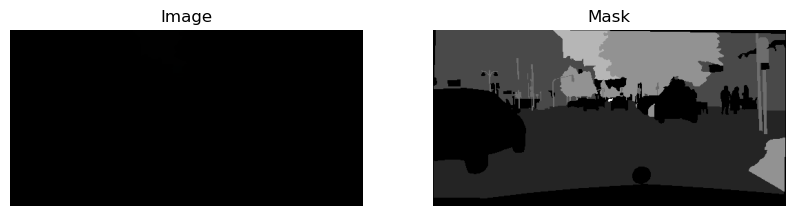

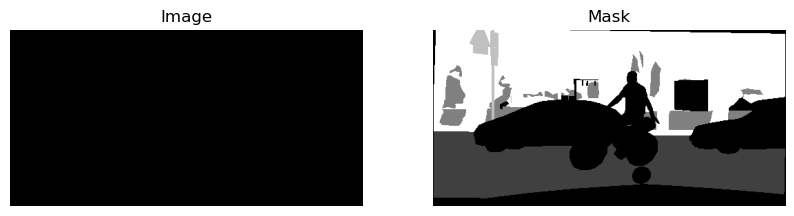

Epoch 1/50
  6/371 ━━━━━━━━━━━━━━━━━━━━ 2:59:55 30s/step - accuracy: 0.3299 - f1-score: 0.1857 - iou_score: 0.1810 - loss: 2.7716

KeyboardInterrupt: 

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, UpSampling2D, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import EfficientNetB3
from collections import namedtuple
import albumentations as A
from albumentations import (
    Compose, HorizontalFlip, RandomBrightnessContrast, RandomRotate90, PadIfNeeded, RandomCrop,
    RandomScale, ShiftScaleRotate, GridDistortion, ElasticTransform, OpticalDistortion,
    HueSaturationValue, GaussNoise, MotionBlur, MedianBlur, Blur
)
import segmentation_models as sm
import cv2

# Assurer la compatibilité avec tensorflow.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Définition de la structure Label
Label = namedtuple('Label', [
    'name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'
])

# Liste complète des labels
labels = [
    Label('unlabeled', 0, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('ego vehicle', 1, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('rectification border', 2, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('out of roi', 3, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('static', 4, 255, 'void', 0, False, True, (0, 0, 0)),
    Label('dynamic', 5, 255, 'void', 0, False, True, (111, 74, 0)),
    Label('ground', 6, 255, 'void', 0, False, True, (81, 0, 81)),
    Label('road', 7, 0, 'flat', 1, False, False, (128, 64, 128)),
    Label('sidewalk', 8, 1, 'flat', 1, False, False, (244, 35, 232)),
    Label('parking', 9, 255, 'flat', 1, False, True, (250, 170, 160)),
    Label('rail track', 10, 255, 'flat', 1, False, True, (230, 150, 140)),
    Label('building', 11, 2, 'construction', 2, False, False, (70, 70, 70)),
    Label('wall', 12, 3, 'construction', 2, False, False, (102, 102, 156)),
    Label('fence', 13, 4, 'construction', 2, False, False, (190, 153, 153)),
    Label('guard rail', 14, 255, 'construction', 2, False, True, (180, 165, 180)),
    Label('bridge', 15, 255, 'construction', 2, False, True, (150, 100, 100)),
    Label('tunnel', 16, 255, 'construction', 2, False, True, (150, 120, 90)),
    Label('pole', 17, 5, 'object', 3, False, False, (153, 153, 153)),
    Label('polegroup', 18, 255, 'object', 3, False, True, (153, 153, 153)),
    Label('traffic light', 19, 6, 'object', 3, False, False, (250, 170, 30)),
    Label('traffic sign', 20, 7, 'object', 3, False, False, (220, 220, 0)),
    Label('vegetation', 21, 8, 'nature', 4, False, False, (107, 142, 35)),
    Label('terrain', 22, 9, 'nature', 4, False, False, (152, 251, 152)),
    Label('sky', 23, 10, 'sky', 5, False, False, (70, 130, 180)),
    Label('person', 24, 11, 'human', 6, True, False, (220, 20, 60)),
    Label('rider', 25, 12, 'human', 6, True, False, (255, 0, 0)),
    Label('car', 26, 13, 'vehicle', 7, True, False, (0, 0, 142)),
    Label('truck', 27, 14, 'vehicle', 7, True, False, (0, 0, 70)),
    Label('bus', 28, 15, 'vehicle', 7, True, False, (0, 60, 100)),
    Label('caravan', 29, 255, 'vehicle', 7, True, True, (0, 0, 90)),
    Label('trailer', 30, 255, 'vehicle', 7, True, True, (0, 0, 110)),
    Label('train', 31, 16, 'vehicle', 7, True, False, (0, 80, 100)),
    Label('motorcycle', 32, 17, 'vehicle', 7, True, False, (0, 0, 230)),
    Label('bicycle', 33, 18, 'vehicle', 7, True, False, (119, 11, 32)),
    Label('license plate', -1, -1, 'vehicle', 7, False, True, (0, 0, 142)),
]

# Dictionnaire pour regrouper les catId à des noms de catégories simplifiées
category_mapping = {
    0: 'void', 1: 'flat', 2: 'construction', 3: 'object',
    4: 'nature', 5: 'sky', 6: 'human', 7: 'vehicle',
}

# Fonction pour mapper les catId aux catégories simplifiées
def map_category(label):
    new_category = category_mapping.get(label.categoryId, 'unknown')
    return Label(
        name=label.name, id=label.id, trainId=label.trainId,
        category=new_category, categoryId=label.categoryId,
        hasInstances=label.hasInstances, ignoreInEval=label.ignoreInEval,
        color=label.color
    )

# Application de la fonction avec une compréhension de liste
grouped_labels = [map_category(label) for label in labels]

# Chemins des images redimensionnées pour l'entraînement et la validation
train_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/train/resized"
train_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/train/resized"
val_images_dir_left = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val"
val_images_dir_gtfine = "/Users/kevinroualec/Desktop/imgp8/gtFine/val"

# Fonction pour récupérer les chemins d'image dans les sous-dossiers
def get_image_paths(directory):
    return [os.path.join(root, file) for root, _, files in os.walk(directory) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Fonction pour charger et normaliser les images
def load_image(image_path):
    try:
        img = keras.preprocessing.image.load_img(image_path, target_size=(256, 512))
        img = keras.preprocessing.image.img_to_array(img) / 255.0
        return img
    except Exception as e:
        print(f"Warning: {image_path} is corrupted or cannot be loaded. Skipping this file.")
        return None

# Fonction pour charger les masques
def load_mask(mask_path):
    try:
        img = keras.preprocessing.image.load_img(mask_path, target_size=(256, 512), color_mode="grayscale")
        return keras.preprocessing.image.img_to_array(img).astype('float32')
    except Exception as e:
        print(f"Warning: {mask_path} is corrupted or cannot be loaded. Skipping this file. Error: {e}")
        return None

# Fonction pour appliquer le mappage des catégories sur le masque
def apply_category_mapping(mask):
    new_mask = np.zeros_like(mask, dtype=np.uint8)
    for label in labels:
        new_mask[mask == label.id] = label.categoryId
    return new_mask.astype(np.uint8)

# Fonction de visualisation pour afficher l'image et son masque côte à côte
def visualize_sample(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image.astype('uint8'))
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask.squeeze(), cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

# Définir les transformations d'augmentation avec une probabilité de 0.5
transform = Compose([
    HorizontalFlip(p=0.5),
    RandomBrightnessContrast(p=0.5),
    RandomRotate90(p=0.5),
    PadIfNeeded(min_height=256, min_width=512, border_mode=cv2.BORDER_REFLECT_101, p=1.0),
    RandomCrop(height=256, width=512, p=1.0),
    RandomScale(scale_limit=0.2, p=0.5),
    ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=45, p=0.5),
    GridDistortion(p=0.5),
    ElasticTransform(p=0.5),
    OpticalDistortion(p=0.5),
    HueSaturationValue(p=0.5),
    GaussNoise(p=0.5),
    MotionBlur(p=0.5),
    MedianBlur(blur_limit=3, p=0.5),
    Blur(blur_limit=3, p=0.5)
], p=0.5)  # Probabilité globale pour appliquer les transformations

def data_generator(image_paths, mask_paths, batch_size, visualize=True):
    index = 0
    first_batch = True
    shuffle_indices = np.arange(len(image_paths))
    np.random.shuffle(shuffle_indices)

    while True:
        batch_images = []
        batch_masks = []

        for _ in range(batch_size):
            if index >= len(image_paths):
                index = 0
                np.random.shuffle(shuffle_indices)

            shuffled_idx = shuffle_indices[index]
            image_path = image_paths[shuffled_idx]
            mask_filename = os.path.basename(image_path).replace('leftImg8bit', 'gtFine_instanceIds')
            mask_path = next((mp for mp in mask_paths if os.path.basename(mp) == mask_filename), None)

            if not mask_path:
                print(f"Erreur: Aucun masque trouvé pour l'image {image_path}.")
                index += 1
                continue

            img = load_image(image_path)
            mask = load_mask(mask_path)
            if img is not None and mask is not None:
                if img.shape[:2] != mask.shape[:2]:
                    #print(f"Erreur: L'image {image_path} et son masque {mask_path} ont des tailles différentes.")
                    continue

                img = A.Resize(height=256, width=512)(image=img)['image']
                mask = A.Resize(height=256, width=512)(image=mask)['image']
                mask = apply_category_mapping(mask)
                mask = mask.astype('float32')

                augmented = transform(image=img, mask=mask)
                img = augmented['image']
                mask = augmented['mask']

                if img.shape[:2] != (256, 512) or mask.shape[:2] != (256, 512):
                    #print(f"Erreur: L'image ou le masque n'ont pas la taille attendue après transformation.")
                    continue

                batch_images.append(img)
                batch_masks.append(mask)

            index += 1

        if visualize and first_batch:
            for i in range(min(2, len(batch_images))):
                visualize_sample(batch_images[i], batch_masks[i])
            first_batch = False

        yield np.array(batch_images), np.array(batch_masks)

# Fonction de perte combinée : Dice + Cross Entropy
def combined_loss(y_true, y_pred):
    dice_loss = sm.losses.DiceLoss(class_weights=np.ones(8))(y_true, y_pred)
    ce_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_true, y_pred)
    return dice_loss + ce_loss

def build_efficientnet_fpn(input_shape):
    inputs = Input(input_shape)
    backbone = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=inputs)

    skip_layers = ['block2b_add', 'block3b_add', 'block4c_add', 'block6e_add']
    skips = [backbone.get_layer(name).output for name in skip_layers]
    bridge = backbone.get_layer('top_conv').output

    fpn_layers = [Conv2D(256, (1, 1), activation='relu', padding='same')(skip) for skip in skips]
    fpn_layers = [UpSampling2D(size=(2**i, 2**i), interpolation='bilinear')(layer) for i, layer in enumerate(fpn_layers)]

    target_size = (256, 512)
    fpn_layers = [Lambda(lambda x: tf.image.resize(x, target_size))(layer) for layer in fpn_layers]

    fpn_combined = Concatenate()(fpn_layers)
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(fpn_combined)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    outputs = Conv2D(8, (1, 1), activation='softmax', padding='same')(x)
    outputs = Lambda(lambda x: tf.image.resize(x, target_size))(outputs)

    model = Model(inputs, outputs)
    return model

# Initialisation du modèle
model = build_efficientnet_fpn((256, 512, 3))

# Créer les métriques (IoU, Dice, Accuracy)
iou_metric = sm.metrics.IOUScore()
dice_metric = sm.metrics.FScore(beta=1)
accuracy_metric = 'accuracy'

# Définition d'un optimiseur
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compilation du modèle
model.compile(
    optimizer=optimizer,
    loss=combined_loss,
    metrics=[iou_metric, dice_metric, accuracy_metric]
)

# Paramètres d'entraînement
batch_size = 8
epochs = 50

# Récupération des images et masques pour l'entraînement
train_images_paths = get_image_paths(train_images_dir_left)
train_mask_paths = get_image_paths(train_images_dir_gtfine)

val_images_paths = get_image_paths(val_images_dir_left)
val_mask_paths = get_image_paths(val_images_dir_gtfine)

train_gen = data_generator(train_images_paths, train_mask_paths, batch_size)
val_gen = data_generator(val_images_paths, val_mask_paths, batch_size)

# Callbacks
callbacks = [
    ModelCheckpoint('efficientnet_fpn_model_best_iou_combined_loss_aug.keras', monitor='val_iou_score', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=2, verbose=1),
    EarlyStopping(patience=25, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_images_paths) // batch_size,
    validation_data=val_gen,
    validation_steps=len(val_images_paths) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)

# Fonction pour visualiser les métriques
def plot_metrics(history):
    plt.figure(figsize=(16, 12))
    metrics = ['loss', 'accuracy', 'f1-score', 'iou_score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
            plt.title(metric.replace('_', ' ').capitalize())
            plt.legend()
            plt.grid()
    plt.tight_layout()
    plt.show()

# Fonction pour visualiser les prédictions
def visualize_prediction(image_path, mask_path, model):
    assert os.path.exists(image_path), f"Erreur : {image_path} n'existe pas !"
    assert os.path.exists(mask_path), f"Erreur : {mask_path} n'existe pas !"

    image = load_image(image_path)
    mask = load_mask(mask_path)

    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_mask = np.argmax(prediction, axis=-1)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask Réel")
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Prédiction")
    plt.imshow(predicted_mask, cmap='gray')
    plt.show()

# Définition des chemins
image_path = "/Users/kevinroualec/Desktop/imgp8/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "/Users/kevinroualec/Desktop/imgp8/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_instanceIds.png"

# Exécution de la visualisation
visualize_prediction(image_path, mask_path, model)
